In [36]:
# testalgo = 'hbbft'
testalgo1 = 'hbbft'
testrun1 = 'runUpgrade'
testname1 = 'throughput2' # 'throughput1' or 'throughput2'


testalgo2 = 'hbbft'
testrun2 = 'runUpgradeFull'
testname2 = testname1  # most of the time we wan't to compare the same tests against each other.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# We use larger plot areas, adjust to your needs.
plt.rcParams["figure.figsize"] = (25, 15)

import seaborn as sns
sns.set(style="darkgrid")



In [38]:

def addCalcedColumns(df):
    df['blockTime'] =  df.timestamp - df.shift(1).timestamp
    df['txs'] = df.numberOfTransactions / df.blockTime
    df['blockTimeSinceStart'] =  df.timestamp - df.timestamp.min()

#blocksFile = 'data/' + testalgo + '/' + testrun + '/' + testname + '/blocks.log.csv'

# blocksFile = 'data/hbbft/proofs/poolProtection/blocks.log.csv'

blocksFile1 = 'data/' + testalgo1 + '/' + testrun1 + '/' + testname1 + '/blocks.blocks.csv'
blocksFile2 = 'data/' + testalgo2 + '/' + testrun2 + '/' + testname2 + '/blocks.blocks.csv'


df1 = pd.read_csv(blocksFile1)
df2 = pd.read_csv(blocksFile2)


addCalcedColumns(df1)
addCalcedColumns(df2)


# 1585951074

df2

,blockNumber,numberOfTransactions,gasUsed,timestamp,size,blockTime,txs,blockTimeSinceStart
0,2650,3,63000,1592170485,892,NaN,NaN,0
1,2651,92,1932000,1592170486,10148,1.0,92.0,1
2,2652,164,3444000,1592170487,17636,1.0,164.0,2
3,2653,270,5670000,1592170488,28659,1.0,270.0,3
4,2654,316,6636000,1592170489,33441,1.0,316.0,4
...,...,...,...,...,...,...,...,...
202,2852,543,11403000,1592170782,57590,1.0,543.0,297
203,2853,871,18291000,1592170784,92031,2.0,435.5,299
204,2854,205,4305000,1592170785,22102,1.0,205.0,300
205,2855,299,6279000,1592170786,31973,1.0,299.0,301


In [39]:
df2[df2.blockTime > 2]

,blockNumber,numberOfTransactions,gasUsed,timestamp,size,blockTime,txs,blockTimeSinceStart
41,2691,952,19992000,1592170543,99582,3.0,317.333333,58
59,2709,952,19992000,1592170578,99584,3.0,317.333333,93
60,2710,927,19467000,1592170581,96975,3.0,309.000000,96
91,2741,800,16800000,1592170628,83774,3.0,266.666667,143


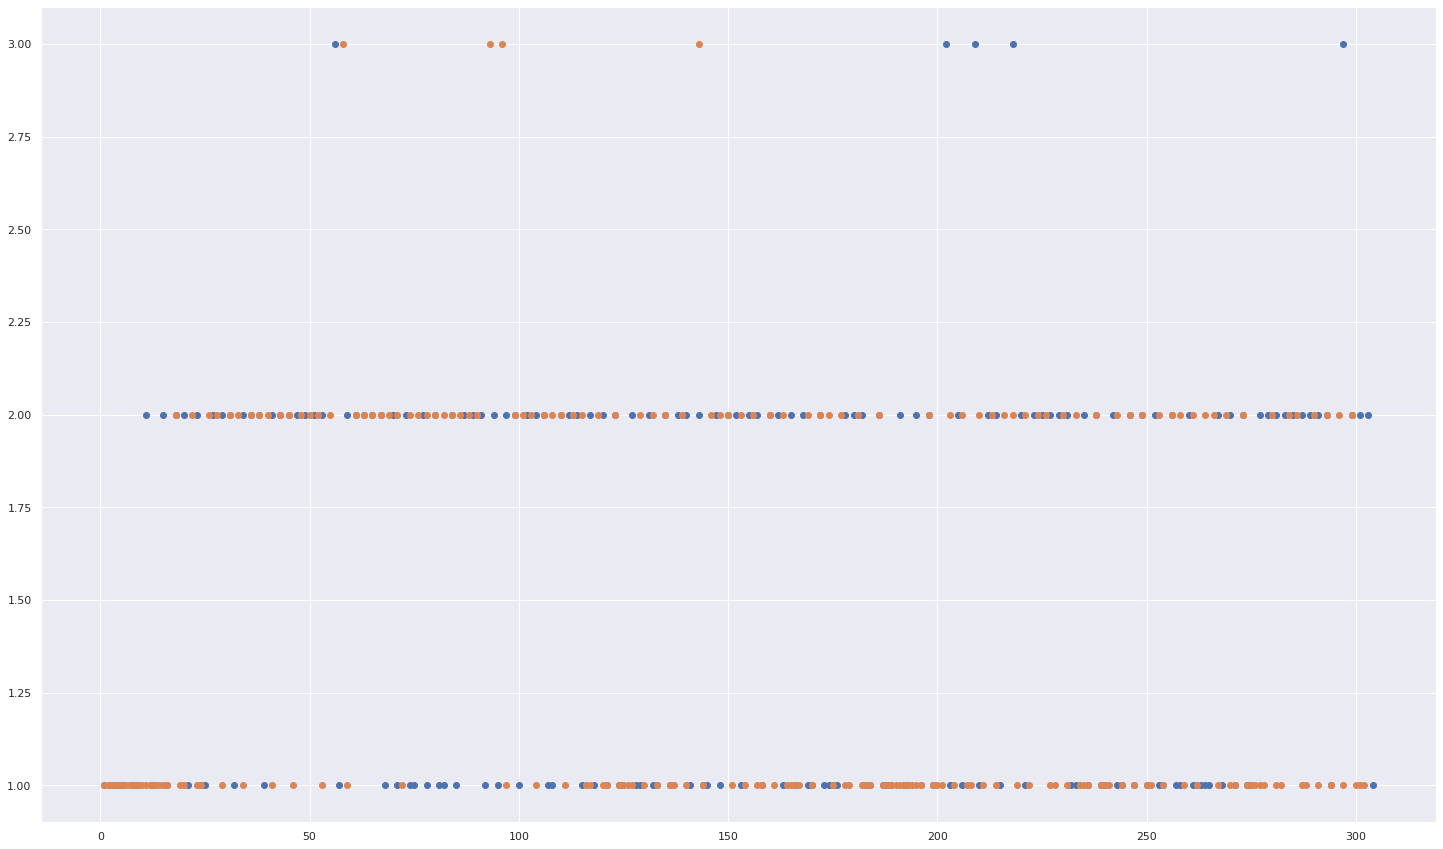

In [40]:
#blocktime chart.

plt.scatter(df1.blockTimeSinceStart, df1.blockTime)
plt.scatter(df2.blockTimeSinceStart, df2.blockTime)

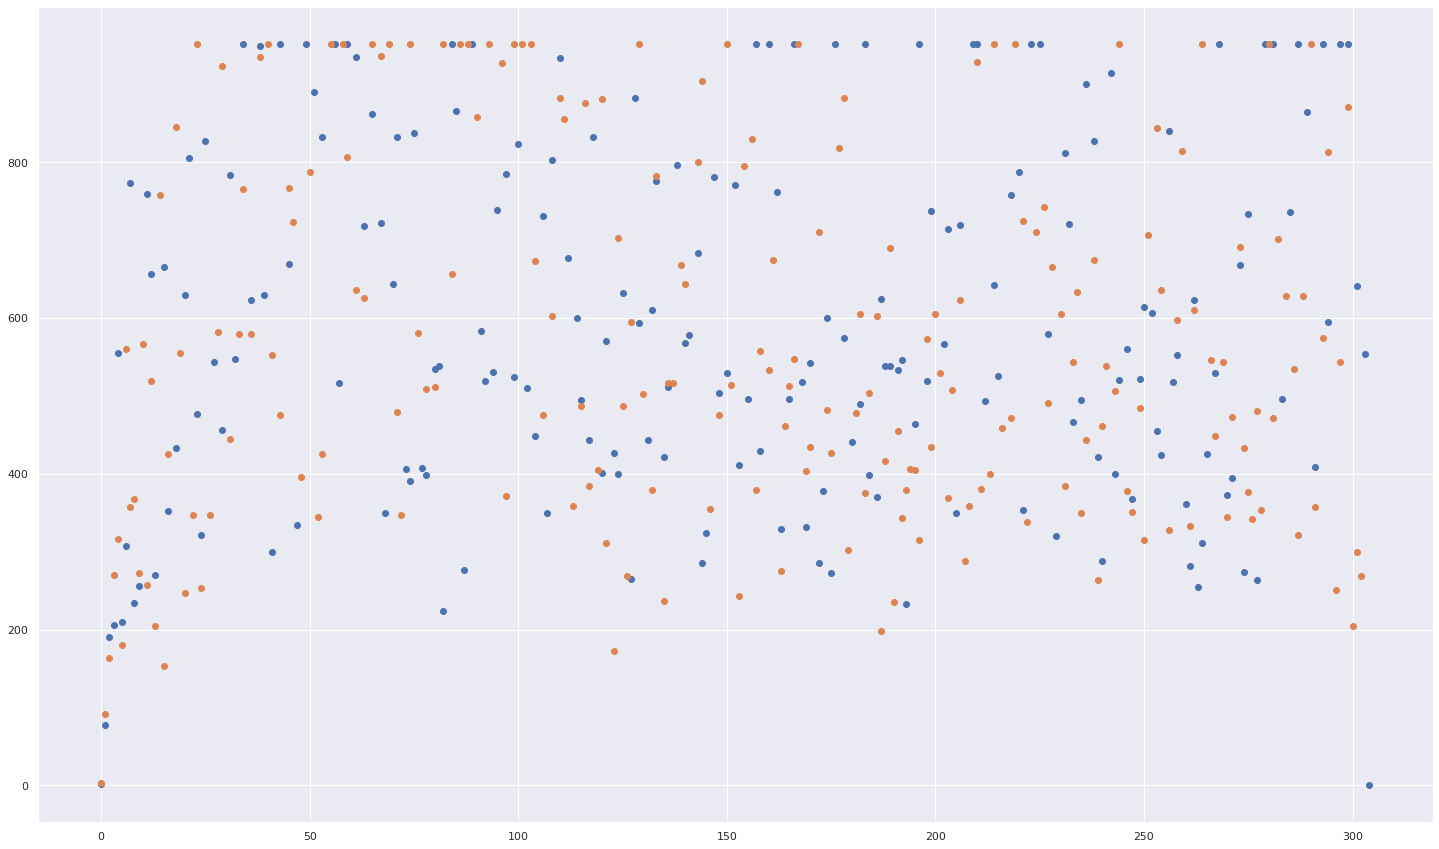

In [41]:
#transactions per block.

plt.scatter(df1.blockTimeSinceStart, df1.numberOfTransactions.rolling(window=1).mean())
# plt.plot(df1.numberOfTransactions.rolling(window=9).mean())

plt.scatter(df2.blockTimeSinceStart, df2.numberOfTransactions.rolling(window=1).mean())
# plt.plot(df2.numberOfTransactions.rolling(window=9).mean())

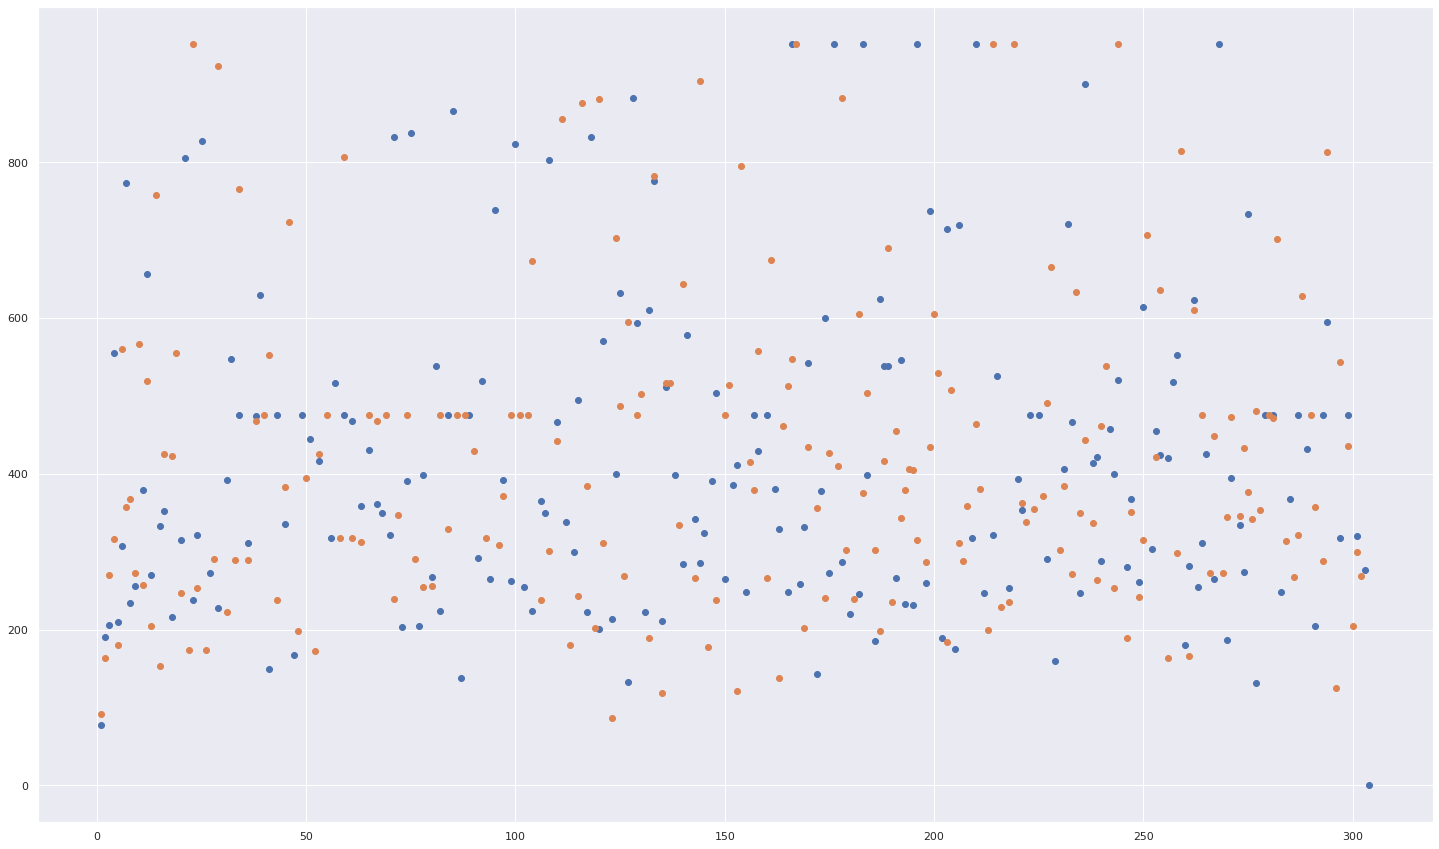

In [42]:
#plt.plot(df3.txs)
plt.scatter(df1.blockTimeSinceStart, df1.txs.rolling(window=1).mean())

#plt.plot(df4.txs)
plt.scatter(df2.blockTimeSinceStart, df2.txs.rolling(window=1).mean())


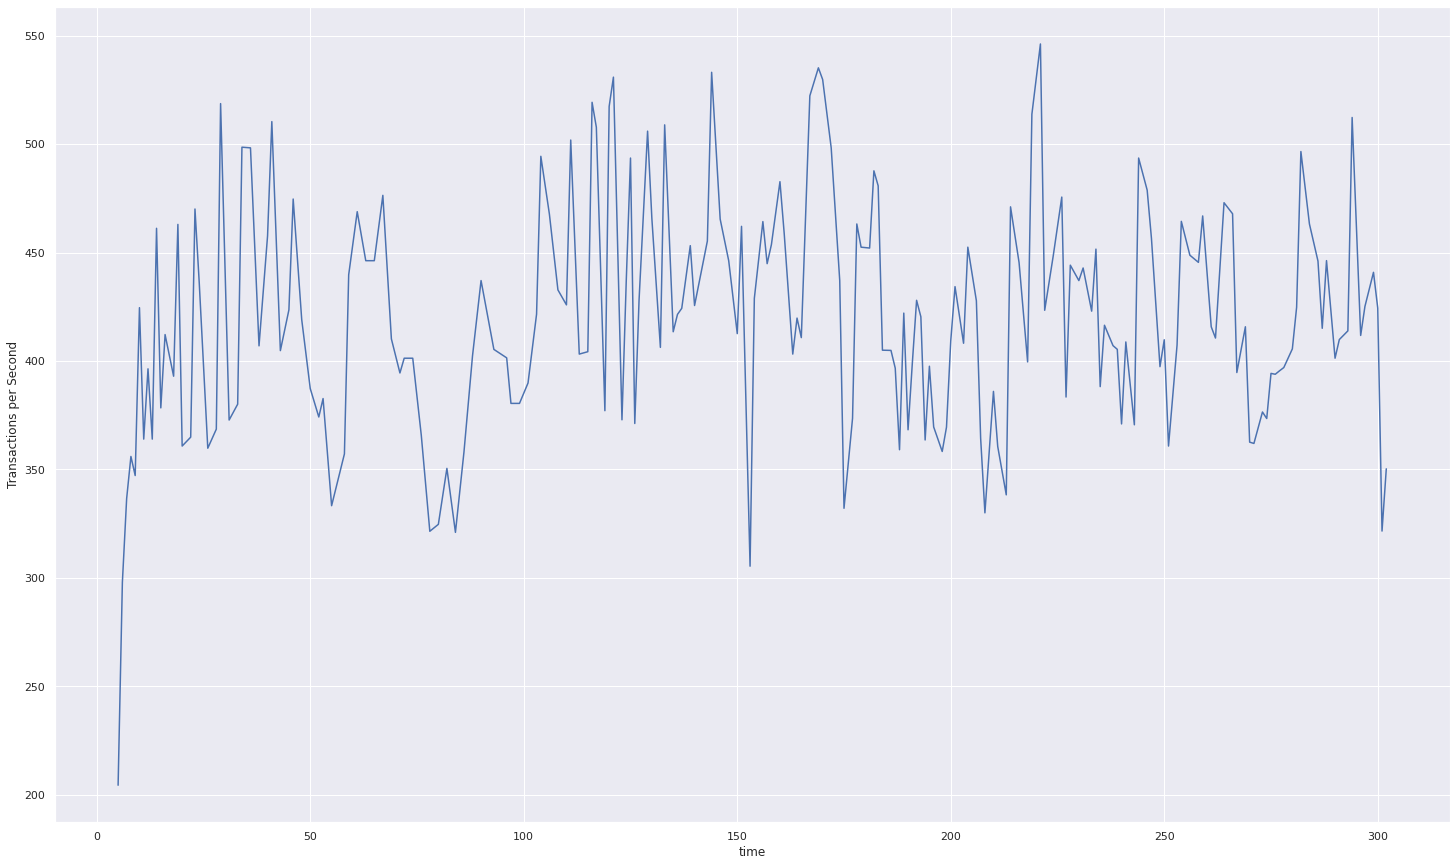

In [43]:
    #plt.plot(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
    
    #plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=1).mean())
    #plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=3).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=5).mean())
    #plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=9).mean())
    #plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=15).mean())

    plt.xlabel('time')
    plt.ylabel('Transactions per Second')

    # major_ticks = np.arange(0, 23, 1)
    # plt.yticks(major_ticks)

    plt.ticklabel_format(style='plain')
    

In [44]:
# transactions per second


def printWithWindowSize(windowSize):
    #plt.plot(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=windowSize).mean(), label='7 txs all 18 ms')

    plt.xlabel('time')
    plt.ylabel('Transactions per Second')

    # major_ticks = np.arange(0, 23, 1)
    # plt.yticks(major_ticks)

    plt.ticklabel_format(style='plain')
    plt.legend()
    






# plotet.write_html('output/throughput' + windowSize +'.html')


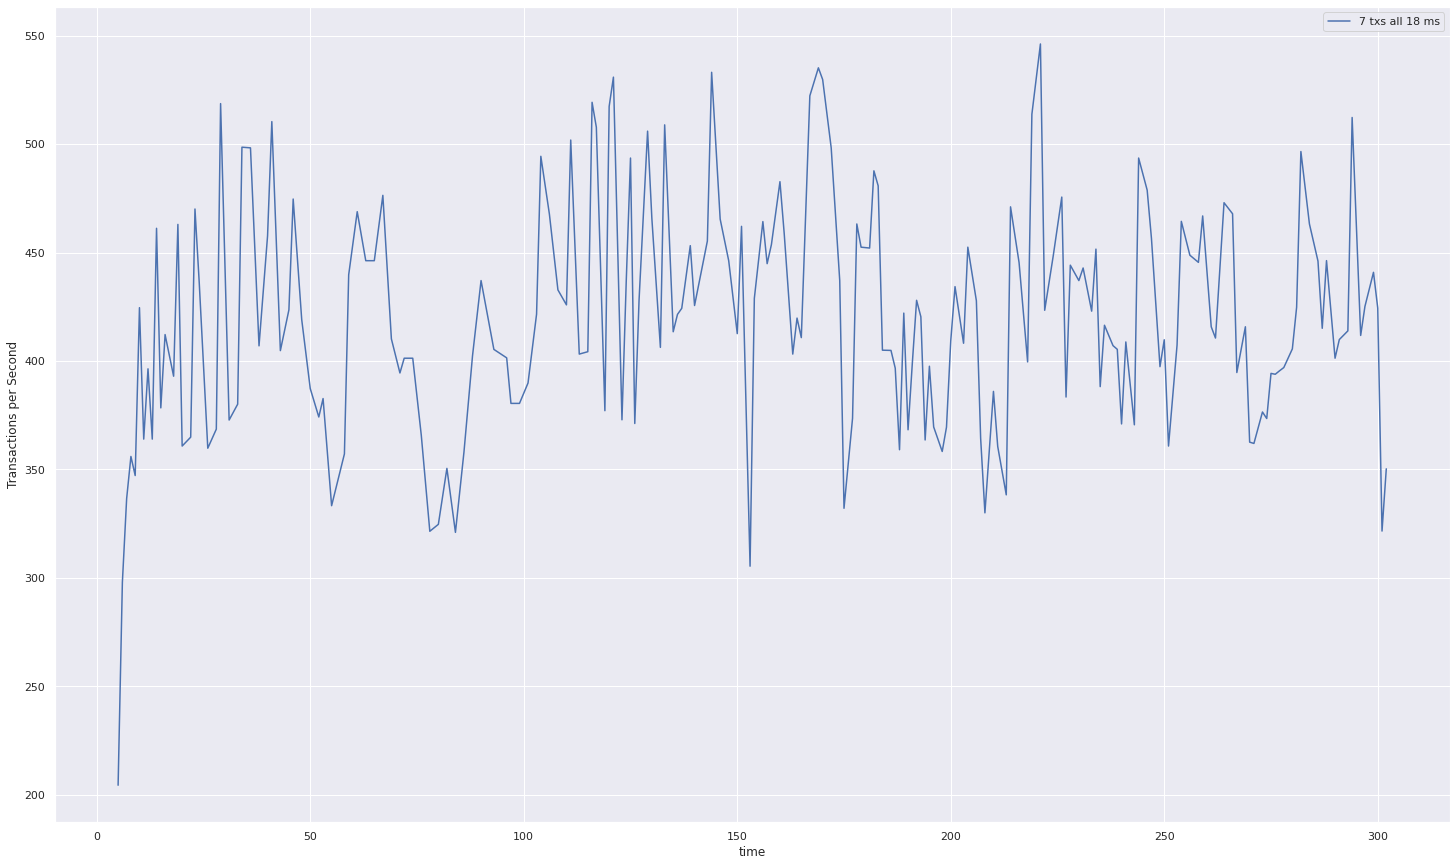

In [45]:
 
printWithWindowSize(5)


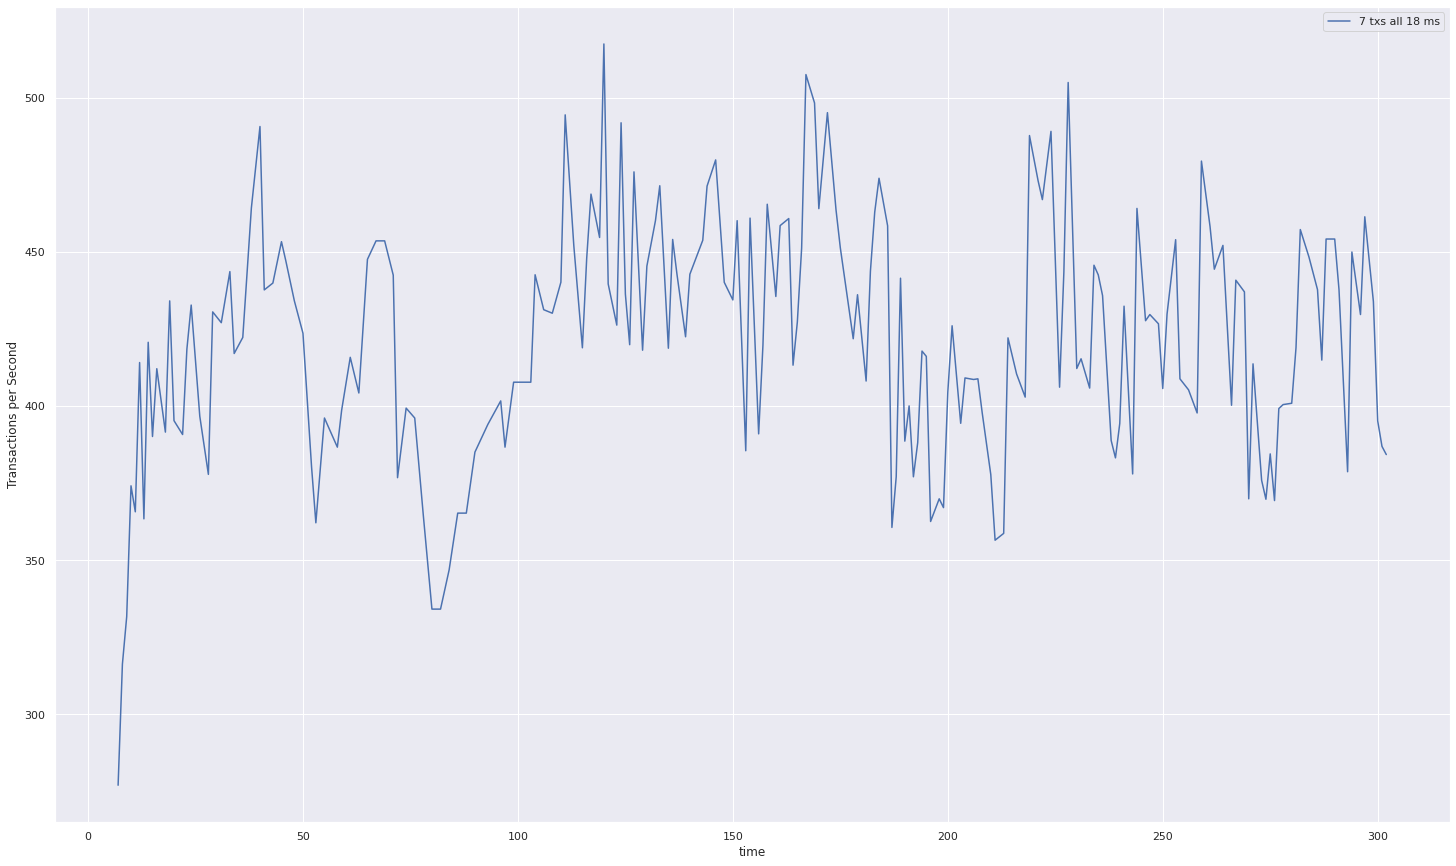

In [46]:
 
printWithWindowSize(7)


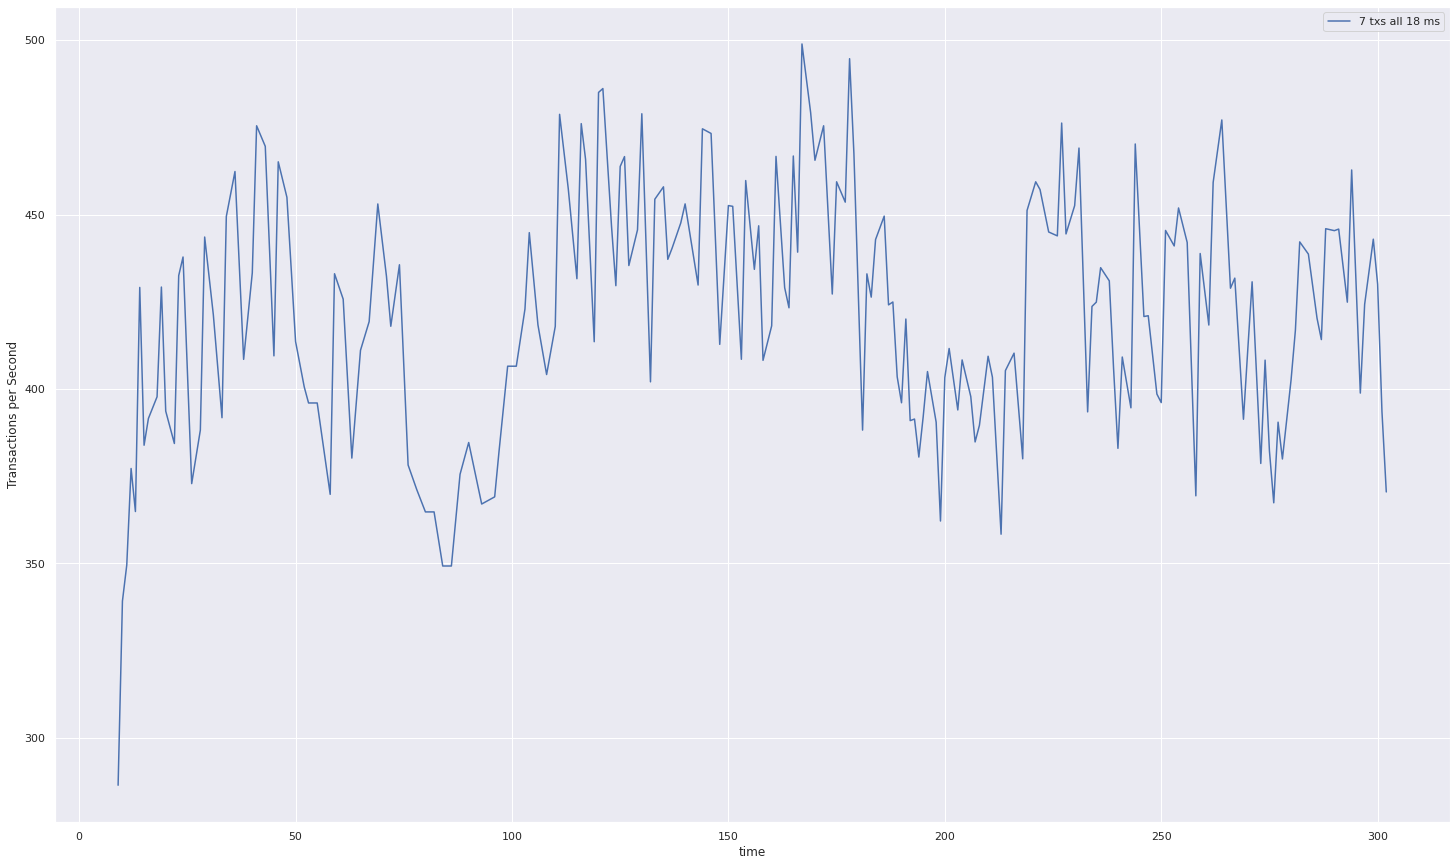

In [47]:
 
printWithWindowSize(9)


In [48]:
windowSize = 5

x = (df1.blockTimeSinceStart, df1.txs.rolling(window=windowSize).min(), df1.txs.rolling(window=windowSize).mean())
x

(0        0
 1        1
 2        2
 3        3
 4        4
       ... 
 192    297
 193    299
 194    301
 195    303
 196    304
 Name: blockTimeSinceStart, Length: 197, dtype: int64,
 0             NaN
 1             NaN
 2             NaN
 3             NaN
 4             NaN
           ...    
 192    204.500000
 193    204.500000
 194    317.333333
 195    277.000000
 196      0.000000
 Name: txs, Length: 197, dtype: float64,
 0             NaN
 1             NaN
 2             NaN
 3             NaN
 4             NaN
           ...    
 192    404.966667
 193    413.766667
 194    436.966667
 195    397.166667
 196    278.166667
 Name: txs, Length: 197, dtype: float64)

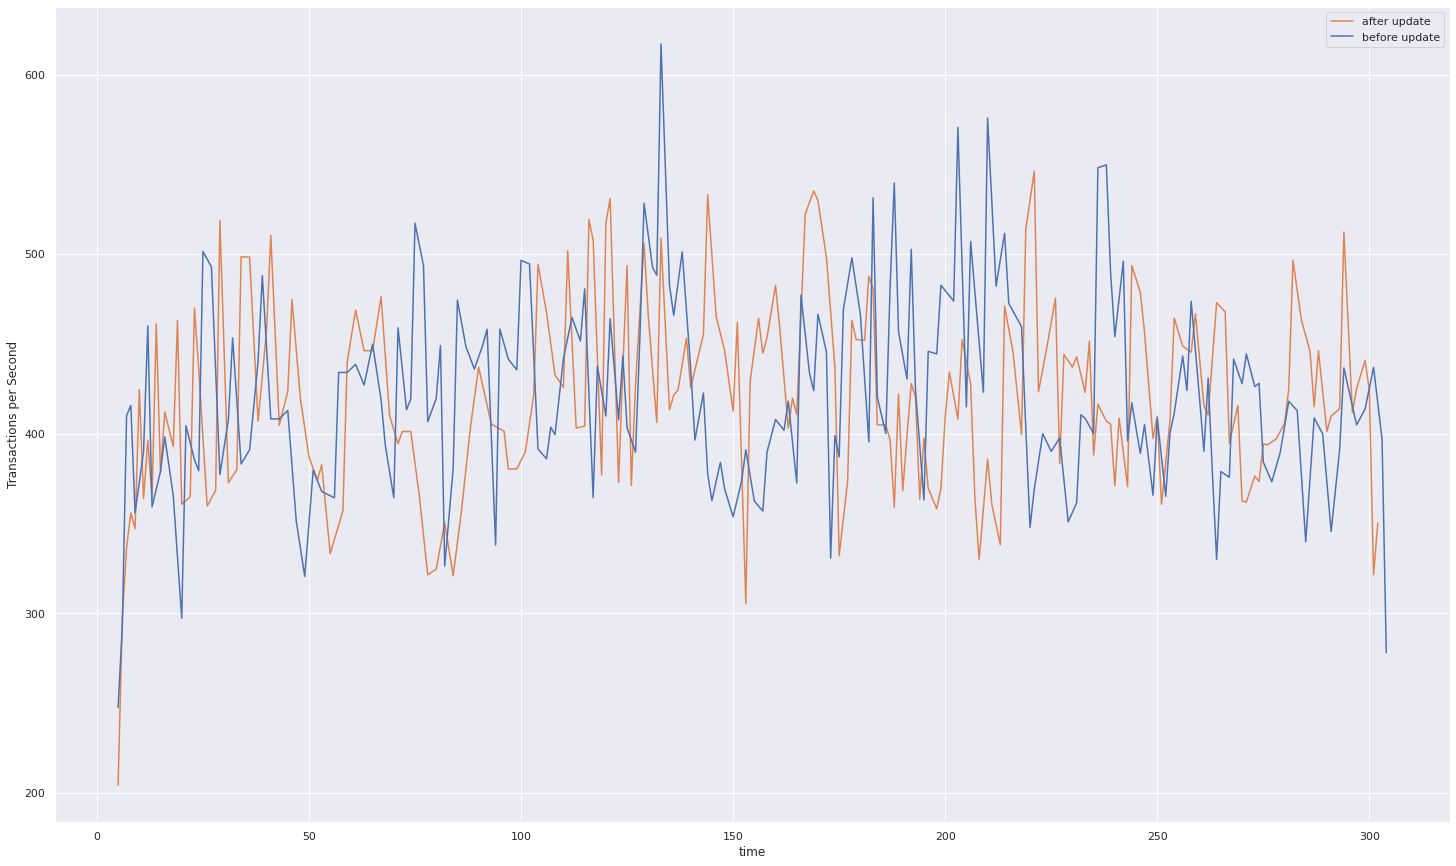

In [49]:
# transactions per second

arange = 8




plt.errorbar(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='before update')
plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=5).mean(), label='after update')

plt.xlabel('time')
plt.ylabel('Transactions per Second')

# major_ticks = np.arange(0, 23, 1)
# plt.yticks(major_ticks)

plt.ticklabel_format(style='plain')
plt.legend()


In [50]:
df2.txs.mean()


416.11812297734633